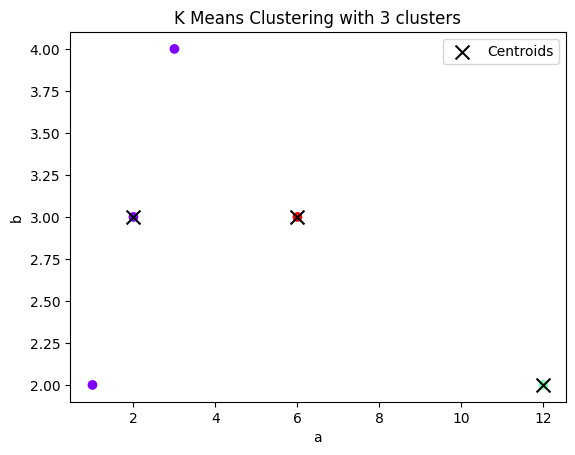

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = pd.read_csv("exp7.csv")

# try:
#     num_clusters = int(input("Enter the number of clusters: "))
# except ValueError:
#     print("Invalid input. Please enter a valid integer.")

num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(data)

cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

data["Cluster"] = labels

plt.scatter(data["a"], data["b"], c=labels, cmap="rainbow")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c="black", marker="x", s=100, label="Centroids")
plt.xlabel("a")
plt.ylabel("b")
plt.title(f"K Means Clustering with {num_clusters} clusters")
plt.legend()
plt.show()


Loaded data:
    a  b
0   1  2
1   3  4
2   2  3
3   6  3
4  12  2


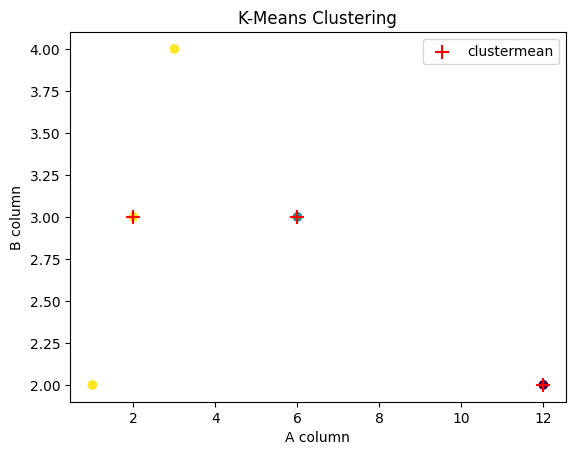

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# def initialize_clustermean(data, k):
#     # Randomly initialize clustermean using numpy
#     return data[np.random.choice(len(data), k, replace=False)]

def initialize_clustermean(data, k):
    # Randomly select k data points as initial cluster means
    rnd = random.sample(list(data), k)
    # print(rnd)
    return rnd

def assign_to_clusters(data, clustermean):
    # Assign each data point to the nearest centroid
    # Using Numpy for calculating euclidean distance
    distances = np.linalg.norm(data[:, np.newaxis] - clustermean, axis=2)
    return np.argmin(distances, axis=1) #returns minimum, that is the cluster assigned

def update_clustermean(data, labels, k):
    # Update clustermean based on the mean of points in each cluster
    clustermean = np.zeros((k, data.shape[1]))
    for i in range(k):
        clustermean[i] = np.mean(data[labels == i], axis=0)
    return clustermean

#START
# 1. Load data from CSV file
file_path = 'exp7.csv'
df = pd.read_csv(file_path)

# 2. Display the loaded data
print("Loaded data:")
print(df.head())

# 3. Extract two features from the DataFrame
data = df[['a', 'b']].values # columns

# 4. Take the number of clusters as input from the user
# k = int(input("Enter the number of clusters: "))
k = 3

# 5. Initialize clustermean
clustermean = initialize_clustermean(data, k)

# 6. Perform k-means iterations
for _ in range(100): #100 max iterations
    # 6.1. Assign points to clusters
    labels = assign_to_clusters(data, clustermean)

    # 6.2. Update cluster mean based on new means 
    new_clustermean = update_clustermean(data, labels, k)

    # 6.3. Check for convergence
    if np.all(clustermean == new_clustermean):
        break
    clustermean = new_clustermean
# END

# Plot the data points and clustermean
plt.scatter(data[:, 0], data[:, 1], c=labels) #plots all objects, c=labels assigns color acc to cluster
plt.scatter(clustermean[:, 0], clustermean[:, 1], marker='+', s=100, color='red', label='clustermean')  #plots red + sign of size 100 at each centroid
plt.title('K-Means Clustering') #title
plt.xlabel('A column') # x axis label
plt.ylabel('B column') # y axis label
plt.legend() # shows legend box in the corner
plt.show()  #shows plot
